In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
loan_data = pd.read_csv(r"C:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\Data\Loan Status Prediction.csv")

In [25]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [27]:
loan_data.shape

(614, 13)

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].median())
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])


In [32]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
loan_data.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [34]:
loan_data.replace(to_replace="3+" , value="4", inplace = True)

In [35]:

loan_data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [36]:
loan_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

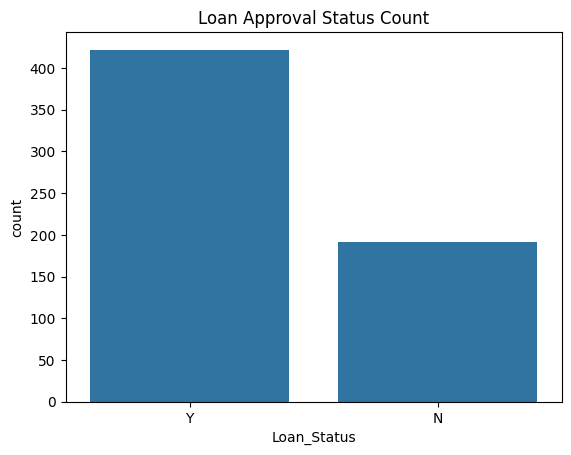

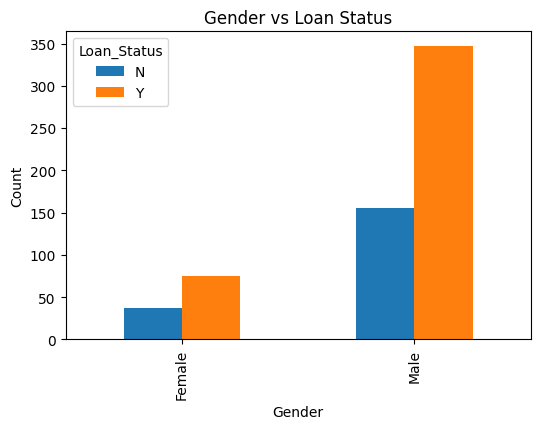

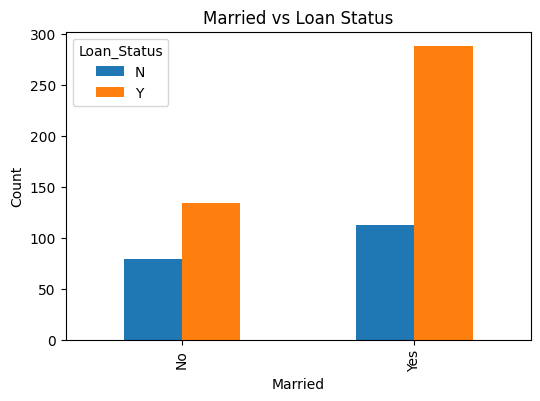

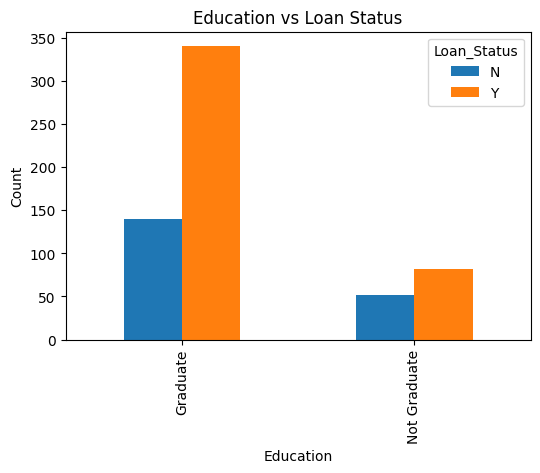

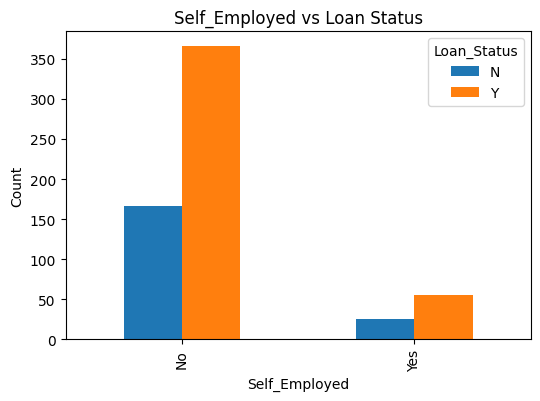

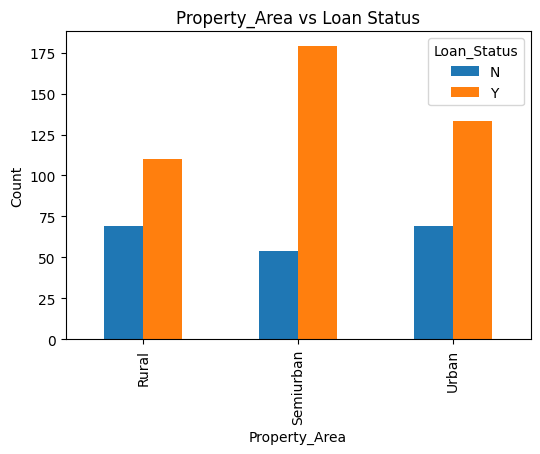

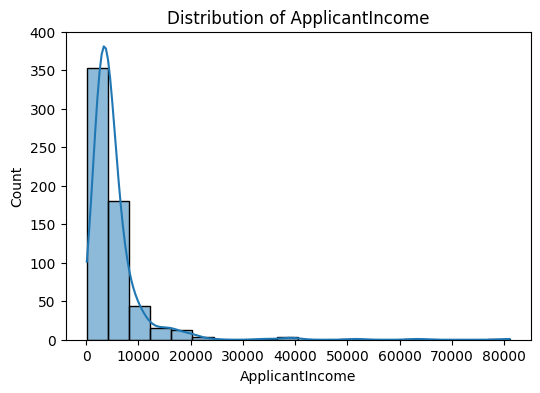

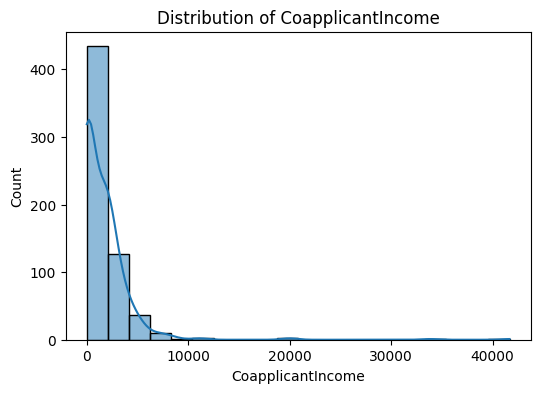

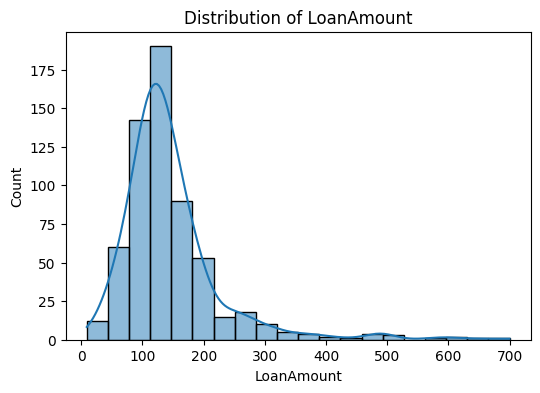

compare_model is not defined. Please run the cell that creates compare_model before this cell.


In [37]:
# Drop Loan_ID column only if it exists
if "Loan_ID" in loan_data.columns:
    loan_data.drop(columns="Loan_ID", inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loan Status Distribution
if "Loan_Status" in loan_data.columns:
    sns.countplot(x='Loan_Status', data=loan_data)
    plt.title("Loan Approval Status Count")
    plt.show()

# 2. Bar plots for categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    if col in loan_data.columns:   # check column exists
        pd.crosstab(loan_data[col], loan_data['Loan_Status']).plot(
            kind='bar', figsize=(6,4))
        plt.title(f"{col} vs Loan Status")
        plt.ylabel("Count")
        plt.show()

# 3. Histograms for numeric columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in num_cols:
    if col in loan_data.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(loan_data[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
if 'compare_model' in globals():
    sns.barplot(x='Model', y='Accuracy_Score', data=compare_model)
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy (%)")
    plt.show()
else:
    print("compare_model is not defined. Please run the cell that creates compare_model before this cell.")


<Axes: xlabel='Education', ylabel='count'>

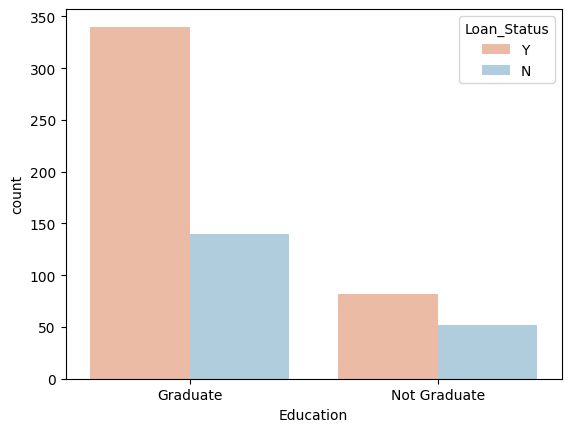

In [38]:
sns.countplot(x="Education", hue = "Loan_Status", data = loan_data, palette="RdBu")

<Axes: xlabel='Gender', ylabel='count'>

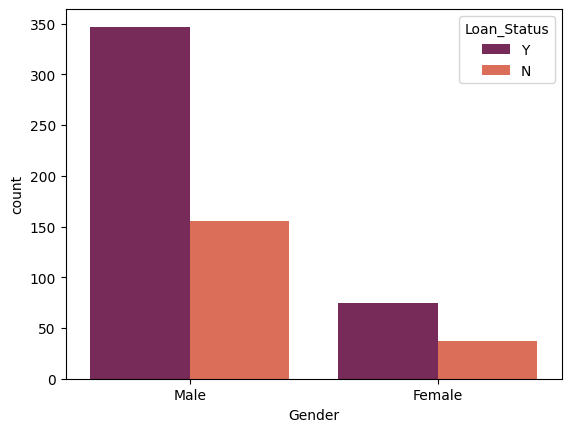

In [39]:
sns.countplot(x = "Gender" , hue = "Loan_Status", data= loan_data, palette= "rocket")

<Axes: xlabel='Married', ylabel='count'>

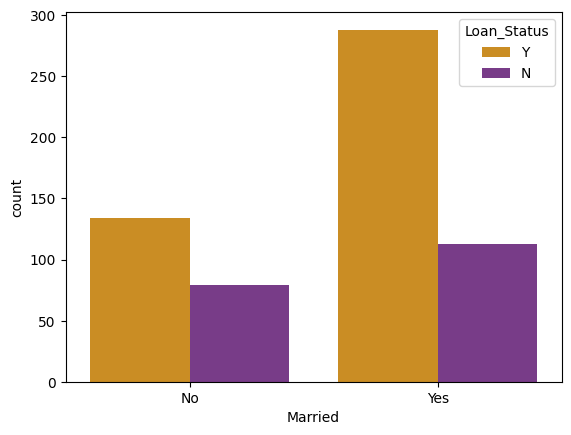

In [40]:
sns.countplot(x = "Married" , hue = "Loan_Status", data= loan_data, palette= "CMRmap_r")

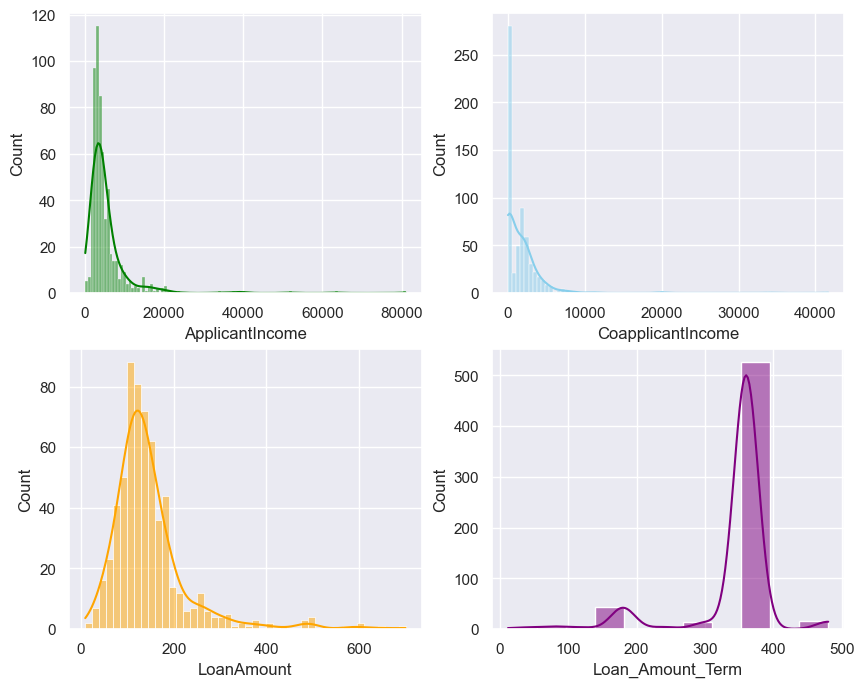

In [41]:

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

In [42]:
lab_end = LabelEncoder()

In [43]:
columns =["Gender","Married","Education","Self_Employed", "Property_Area","Loan_Status"]

loan_data[columns] = loan_data[columns].apply(lab_end.fit_transform)

In [44]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [45]:
# seprating the data in x and y
x = loan_data.drop(columns = "Loan_Status", axis = 1)
y = loan_data["Loan_Status"]

In [46]:
#Train the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2 , stratify=y)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (552, 11) (62, 11)


              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.93      0.80      0.86        50

    accuracy                           0.79        62
   macro avg       0.70      0.78      0.72        62
weighted avg       0.84      0.79      0.81        62

[[ 9  3]
 [10 40]]
Logistic Regression accuracy_score: 79.03% 


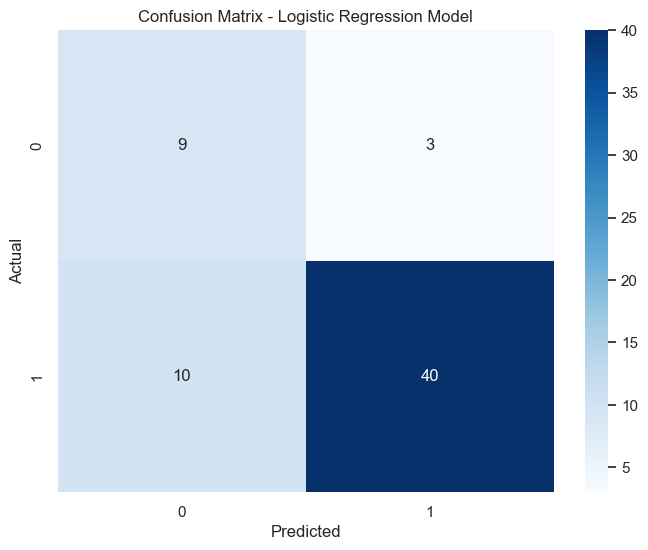

In [48]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") #'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
log_model.fit(x_train,y_train)

log_prediction = log_model.predict(x_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(log_prediction, y_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\venv\Lib\site-p

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82        62

    accuracy                           0.69        62
   macro avg       0.50      0.35      0.41        62
weighted avg       1.00      0.69      0.82        62

[[ 0  0]
 [19 43]]
SVM accuracy_score : 69.35%


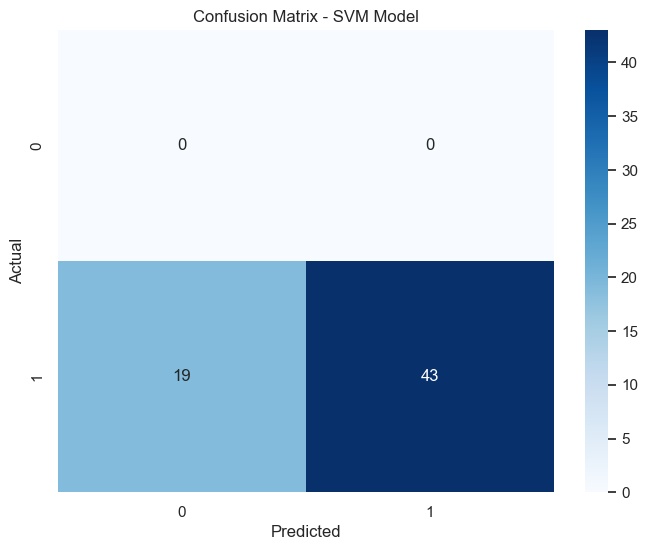

In [49]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(x_train, y_train)

svm_prediction = svm_model.predict(x_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(svm_prediction, y_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        43
           1       0.76      0.80      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.70      0.71      0.70       123



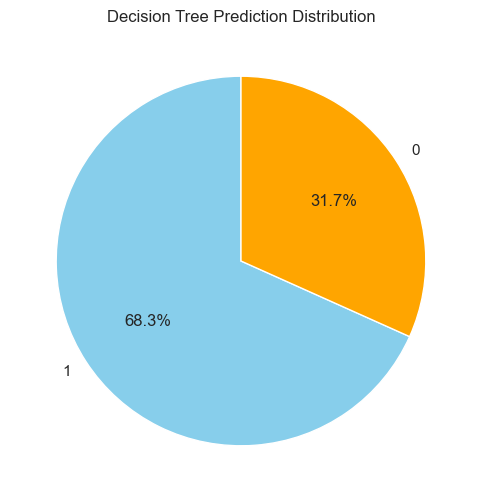

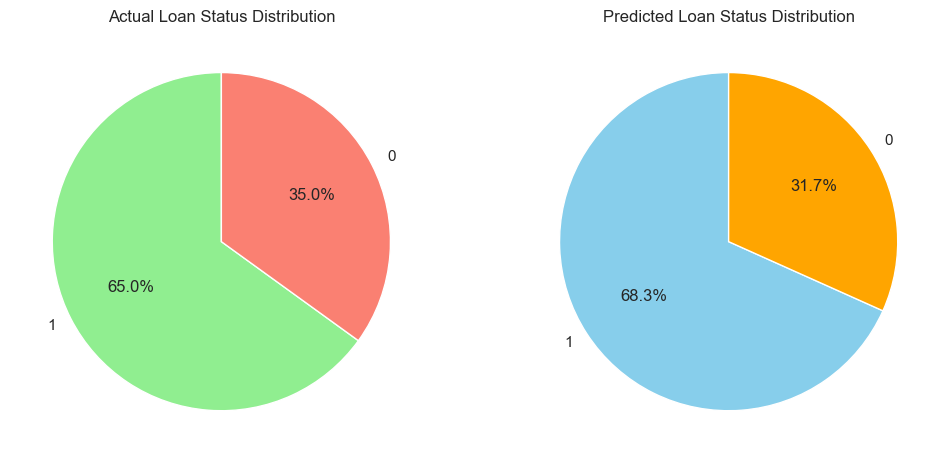

In [50]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of dataset
loan_encoded = loan_data.copy()

# Encode all categorical columns
for col in loan_encoded.columns:
    if loan_encoded[col].dtype == 'object':   # if column is categorical
        loan_encoded[col] = LabelEncoder().fit_transform(loan_encoded[col])

# Now split into features and target
X = loan_encoded.drop(columns=["Loan_Status"])
y = loan_encoded["Loan_Status"]

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(criterion='gini', splitter="random")
dt_model.fit(x_train, y_train)

dt_prediction = dt_model.predict(x_test)
print(classification_report(y_test, dt_prediction))

import matplotlib.pyplot as plt

# Count predictions
prediction_counts = pd.Series(dt_prediction).value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "orange"])
plt.title("Decision Tree Prediction Distribution")
plt.show()
# Actual distribution
actual_counts = y_test.value_counts()

plt.figure(figsize=(12,6))

# Actual pie
plt.subplot(1,2,1)
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "salmon"])
plt.title("Actual Loan Status Distribution")

# Predicted pie
plt.subplot(1,2,2)
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "orange"])
plt.title("Predicted Loan Status Distribution")

plt.show()


In [51]:
# using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(x_train, y_train)

# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

# SVC
svc_params = {'C':[0.5,1], 'kernel':['rbf','sigmoid']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_params_
print(svc)

# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)


{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 0.5, 'kernel': 'rbf'}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9}


Logistic Regression CV Mean Accuracy: 0.8045715047314408
SVM CV Mean Accuracy: 0.6905504464880714
Decision Tree CV Mean Accuracy: 0.7099960015993603


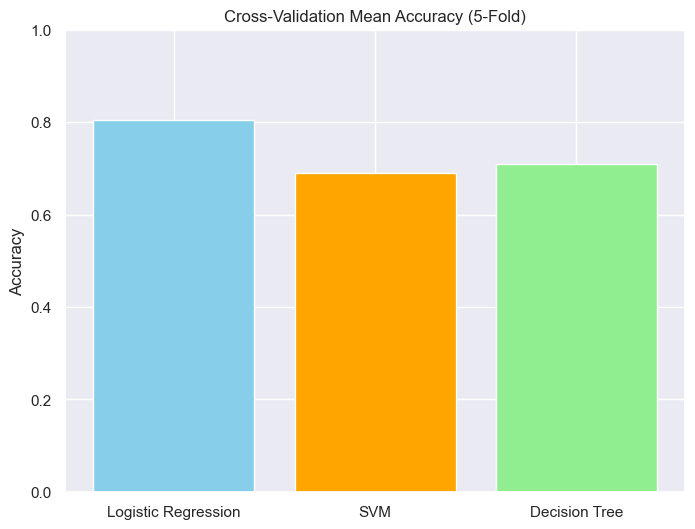

In [52]:
from sklearn.model_selection import cross_val_score

log_cv_scores = cross_val_score(log_model, X, y, cv=5)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
dt_cv_scores  = cross_val_score(dt_model, X, y, cv=5)

print("Logistic Regression CV Mean Accuracy:", log_cv_scores.mean())
print("SVM CV Mean Accuracy:", svm_cv_scores.mean())
print("Decision Tree CV Mean Accuracy:", dt_cv_scores.mean())

import matplotlib.pyplot as plt

# Collect results
cv_results = {
    "Logistic Regression": log_cv_scores.mean(),
    "SVM": svm_cv_scores.mean(),
    "Decision Tree": dt_cv_scores.mean()
}

# Bar chart
plt.figure(figsize=(8,6))
plt.bar(cv_results.keys(), cv_results.values(), color=["skyblue", "orange", "lightgreen"])
plt.title("Cross-Validation Mean Accuracy (5-Fold)")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # accuracy is between 0 and 1
plt.show()



In [53]:
from sklearn.metrics import accuracy_score

# Logistic Regression
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)
log_acc = accuracy_score(y_test, log_pred)

# Support Vector Machine
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Decision Tree
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Compare Models
compare_model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree'],
    'Accuracy_Score': [log_acc*100, svm_acc*100, dt_acc*100]
})

print(compare_model.sort_values(by='Accuracy_Score', ascending=False))


                    Model  Accuracy_Score
0     Logistic Regression       78.861789
2           Decision Tree       67.479675
1  Support Vector Machine       65.853659


It can seen that, all the model accuracy is more than 69%.

The highest accuracy is 79% of the Logistic Regression.

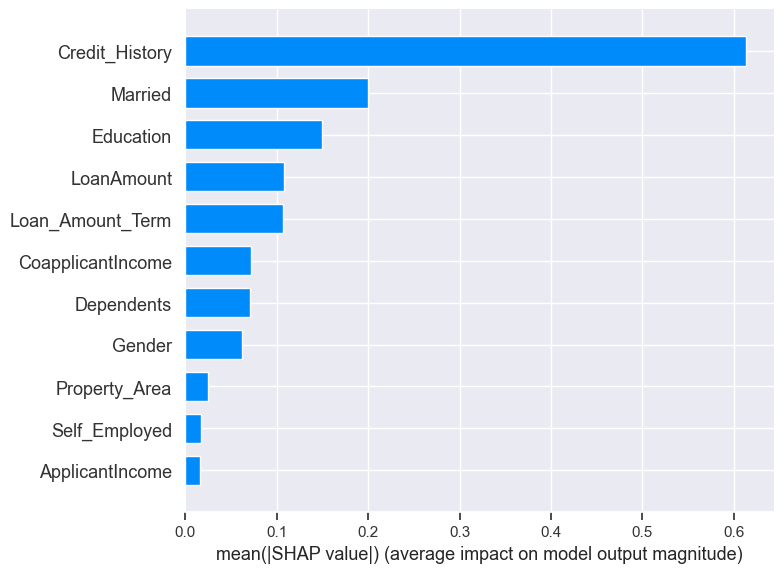

<Figure size 640x480 with 0 Axes>

In [62]:
import shap  # Requires pip install shap (not in notebook, but added for structure)
# SHAP values for Logistic Regression
explainer = shap.Explainer(log_model, x_train)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")
plt.tight_layout()
plt.show()
